In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv('titanic_toy.csv')

In [5]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [7]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [8]:
X = df.drop(columns=['Survived'])
y  = df['Survived']

In [9]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [10]:
X_train.shape , X_test.shape

((712, 3), (179, 3))

In [11]:
X_train.isnull().mean()*100

Age       20.786517
Fare       5.056180
Family     0.000000
dtype: float64

In [12]:
mean_age = df['Age'].mean()
median_age = df['Age'].median()

mean_fare = df['Fare'].mean()
median_fare = df['Fare'].median()

In [13]:
X_train['Age_median'] =  X_train['Age'].fillna(median_age)
X_train['Age_mean'] =  X_train['Age'].fillna(mean_age)

X_train['Fare_median'] =  X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] =  X_train['Fare'].fillna(mean_fare)

In [14]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
377,27.0,211.5000,2,27.0,27.000000,211.5000,211.5000
235,NaN,7.5500,0,28.0,29.699118,7.5500,7.5500
879,56.0,83.1583,1,56.0,56.000000,83.1583,83.1583
344,36.0,13.0000,0,36.0,36.000000,13.0000,13.0000
720,6.0,33.0000,1,6.0,6.000000,33.0000,33.0000


In [15]:
print('Original Age vairable variance : ',X_train['Age'].var())
print('Age variance after median imputation : ',X_train['Age_median'].var())
print('Age variance after mean imputation : ',X_train['Age_mean'].var())

print('Original Fare vairable variance : ',X_train['Fare'].var())
print('Fare variance after median imputation : ',X_train['Fare_median'].var())
print('Fare variance after mean imputation : ',X_train['Fare_mean'].var())

Original Age vairable variance :  204.34951339046142
Age variance after median imputation :  162.3385298533084
Age variance after mean imputation :  161.81386645586778
Original Fare vairable variance :  2448.1979137063163
Fare variance after median imputation :  2340.098181126128
Fare variance after mean imputation :  2324.2440261086986


TypeError: A single argument passed to legend() must be a list of labels, but found an Artist in there.

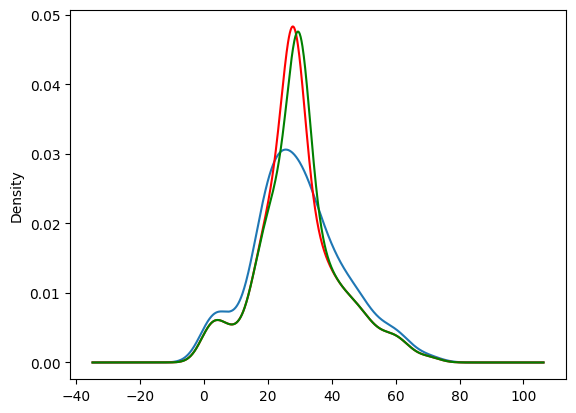

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Age'].plot(kind='kde',ax=ax)

X_train['Age_median'].plot(kind='kde',ax=ax,color = "red")

X_train['Age_mean'].plot(kind='kde',ax=ax , color = "green")

lines , labels = ax.get_legend_handles_labels()
ax.legend(lines,loc="best")

TypeError: A single argument passed to legend() must be a list of labels, but found an Artist in there.

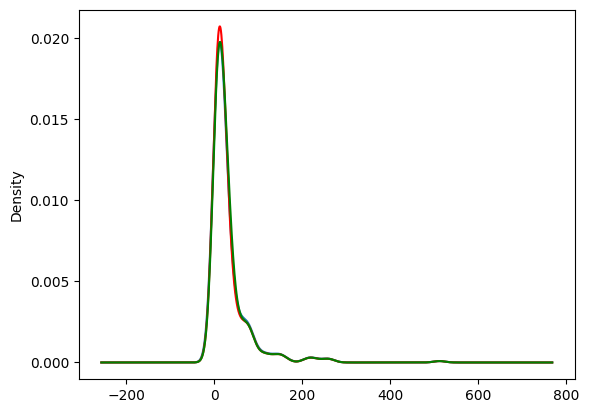

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind='kde',ax=ax)

X_train['Fare_median'].plot(kind='kde',ax=ax,color = "red")

X_train['Fare_mean'].plot(kind='kde',ax=ax , color = "green")

lines , labels = ax.get_legend_handles_labels()
ax.legend(lines,loc="best")

In [21]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858451,66.631558
Fare,70.719262,2448.197914,17.258917,59.661820,55.800924,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.088278,-5.143296,16.476326,16.386748
Age_median,204.349513,59.661820,-5.088278,162.338530,161.838181,55.142638,56.613065
Age_mean,204.349513,55.800924,-5.143296,161.838181,161.813866,51.541608,52.948856
Fare_median,64.858451,2448.197914,16.476326,55.142638,51.541608,2340.098181,2324.533881
Fare_mean,66.631558,2448.197914,16.386748,56.613065,52.948856,2324.533881,2324.244026


In [19]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087355,0.090109
Fare,0.092644,1.000000,0.208268,0.094361,0.088382,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.241469,-0.244475,0.205942,0.205520
Age_median,1.000000,0.094361,-0.241469,1.000000,0.998533,0.089466,0.092165
Age_mean,1.000000,0.088382,-0.244475,0.998533,1.000000,0.083759,0.086339
Fare_median,0.087355,1.000000,0.205942,0.089466,0.083759,1.000000,0.996731
Fare_mean,0.090109,1.000000,0.205520,0.092165,0.086339,0.996731,1.000000


<Axes: >

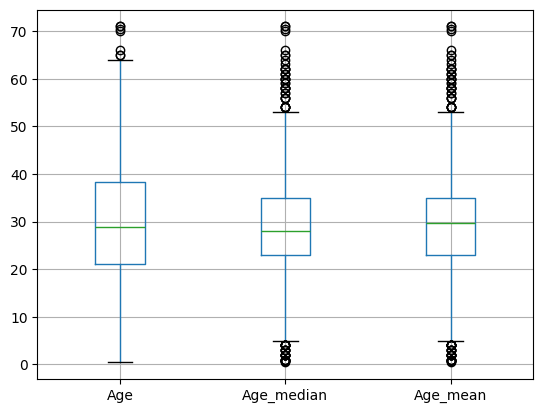

In [20]:
X_train[['Age','Age_median','Age_mean']].boxplot()

<Axes: >

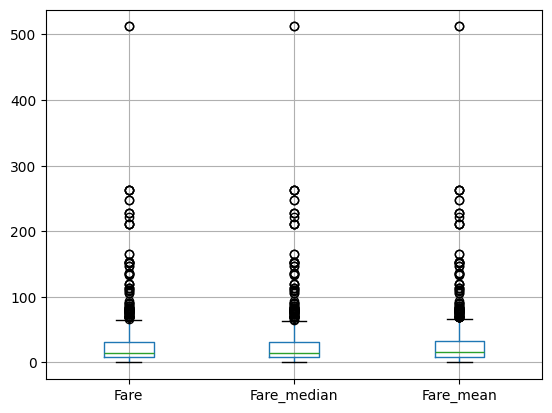

In [22]:
X_train[['Fare','Fare_median','Fare_mean']].boxplot()

# Using Sklearn

In [23]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [24]:
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')

In [25]:
trf = ColumnTransformer(
    [
        ("mean_imputer",mean_imputer,['Age']),
        ("median_imputer",median_imputer,['Fare'])
    ],
remainder='passthrough')

In [26]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('mean_imputer', SimpleImputer(), ['Age']),
                                ('median_imputer',
                                 SimpleImputer(strategy='median'), ['Fare'])])

In [31]:
trf.named_transformers_['mean_imputer'].statistics_

array([29.78590426])

In [33]:
trf.named_transformers_['median_imputer'].statistics_

array([14.4583])

In [34]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)